In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

In [33]:
img_ori = cv2.imread('wang.jpg',1)
img_ori.shape

(1334, 891, 3)

# image reading

In [3]:
def my_show(img, size=(5,5)):
    plt.figure(figsize=size)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()

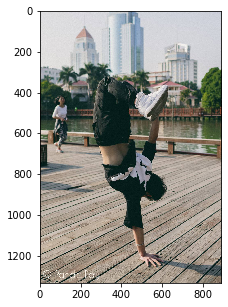

In [4]:
my_show(img_ori)

# image crop

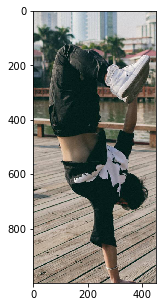

In [5]:
my_show(img_ori[200:1200,200:650])

# channel split

In [6]:
def img_cooler(img,b_increase,r_decrease):
    B,G,R = cv2.split(img)
    b_lim = 255 - b_increase
    B[B>b_lim] = 255
    B[B<=b_lim] = (b_increase + B[B<=b_lim]).astype(img.dtype)
    
    r_lim = r_decrease
    R[R<r_lim] = 0
    R[R>=r_lim] = (R[R>=r_lim] - r_decrease).astype(img.dtype)
    return cv2.merge((B,G,R))

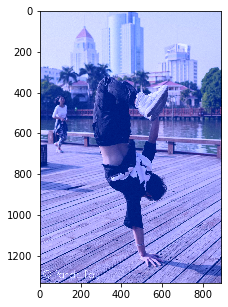

In [7]:
cooler_image = img_cooler(img_ori,100,10)
my_show(cooler_image)

# Gamma Change

In [8]:
def adjust_gamma(img, gamma=1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i/255.0)**invGamma)*255)
    table = np.array(table).astype('uint8')
    return cv2.LUT(img,table)

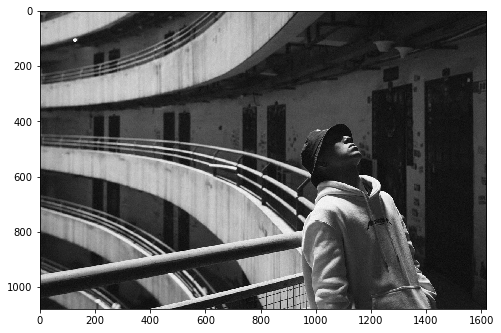

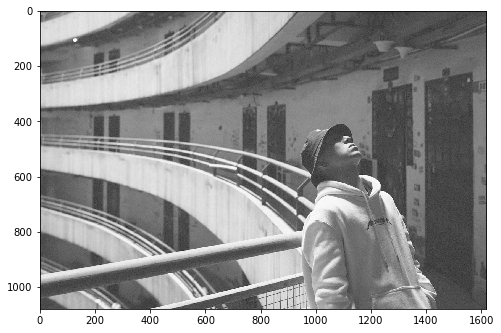

In [9]:
img_dark = cv2.imread('dark1.jpg',1)
my_show(img_dark,size=(8,8))

img_brighter = adjust_gamma(img_dark,2)
my_show(img_brighter,size=(8,8))

# rotation

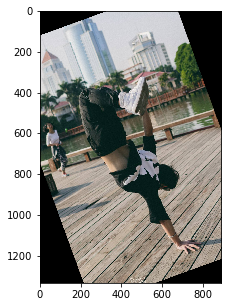

In [10]:
img = img_ori
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 20, 1) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
my_show(img_rotate)


# translation

In [11]:
def transform(image,xoffset,yoffset):
    rows = image.shape[0] + np.abs(yoffset)
    cols = image.shape[1] + np.abs(xoffset)

    dist = np.zeros((rows,cols,image.shape[2]),image.dtype)

    for y in range(rows):
        for x in range(cols):
            new_x = x - xoffset
            new_y = y - yoffset

            if new_x >=0 and new_y >= 0 and new_x < cols and new_y < rows:
                dist[y,x] = image[new_y,new_x] 
    return dist

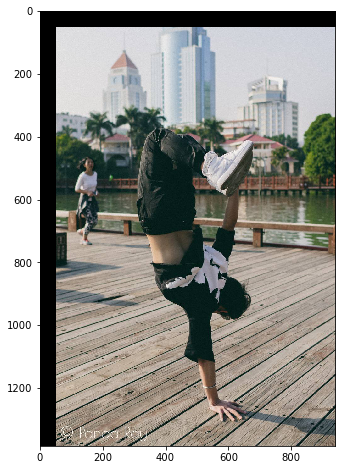

In [12]:
img_transform = transform(img_ori,50,50)
my_show(img_transform,size=(8,8))

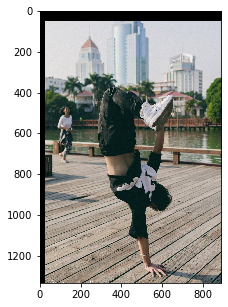

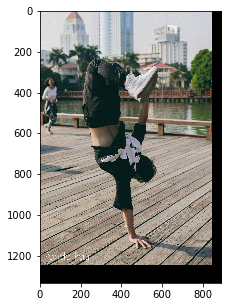

In [13]:
img = img_ori
M = np.float32([[1, 0, 25], [0, 1, 50]]) 
shifted1 = cv2.warpAffine(img_ori, M, (img.shape[1], img.shape[0])) 
my_show(shifted1)

M = np.float32([[1, 0, -50], [0, 1, -90]]) 
shifted2 = cv2.warpAffine(img_ori, M, (img.shape[1], img.shape[0])) 
my_show(shifted2)

# scale

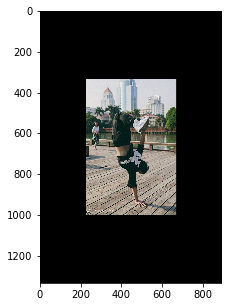

In [14]:
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 0, 0.5) # center, angle, scale
img_scale = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
my_show(img_scale)

# scale+rotation+translation = similarity transform

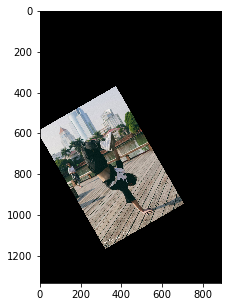

In [15]:
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 0.5) # center, angle, scale
img_st = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
M2 = np.float32([[1, 0, -100], [0, 1, 100]]) 
similarity_transform = cv2.warpAffine(img_st, M2, (img.shape[1], img.shape[0])) 
my_show(similarity_transform)

# Affine_transform

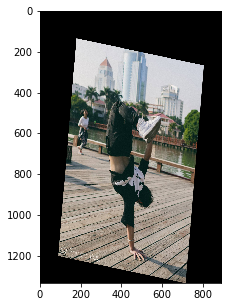

In [16]:
rows, cols, ch = img.shape
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])
 
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

my_show(dst)

# perspective transform

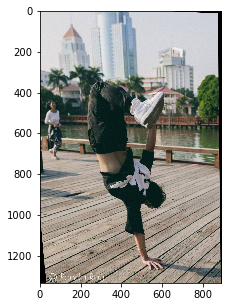

In [17]:
img = img_ori

def random_perspectiv_transform(img, row, col):
    height, width, channels = img.shape
    
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_pt = cv2.getPerspectiveTransform(pts1, pts2)
    img_pt = cv2.warpPerspective(img, M_pt, (width, height))
    return M_pt, img_pt
M_pt, img_pt = random_perspectiv_transform(img, img.shape[0], img.shape[1])
my_show(img_pt)

# Optionl:Please change image color through YUV/HSV space

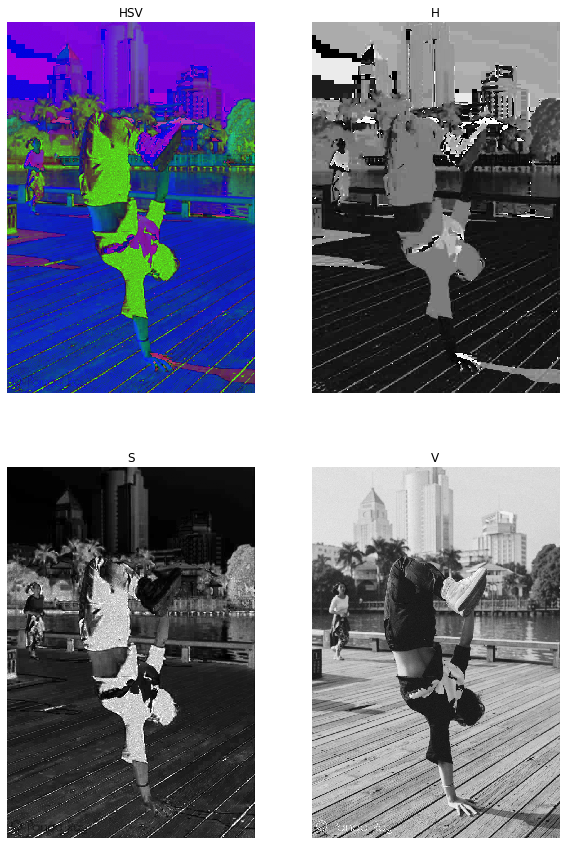

In [18]:
#HSV颜色空间

img_hsv = cv2.cvtColor(img_ori, cv2.COLOR_BGR2HSV)
img_h = img_hsv[..., 0]
img_s = img_hsv[..., 1]
img_v = img_hsv[..., 2]

fig = plt.gcf()                     
fig.set_size_inches(10, 15)

plt.subplot(221)
plt.imshow(img_hsv)
plt.axis('off')
plt.title('HSV')

plt.subplot(222)
plt.imshow(img_h, cmap='gray')
plt.axis('off')
plt.title('H')

plt.subplot(223)
plt.imshow(img_s, cmap='gray')
plt.axis('off')
plt.title('S')

plt.subplot(224)
plt.imshow(img_v, cmap='gray')
plt.axis('off')
plt.title('V')

plt.show()


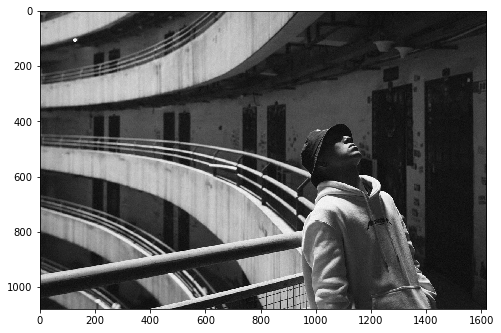

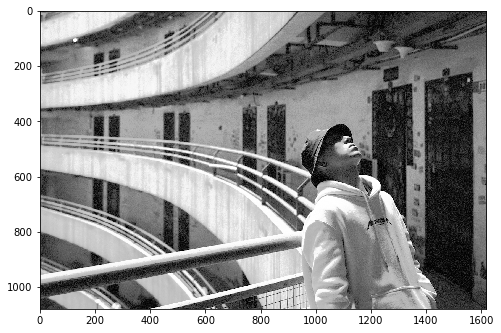

In [19]:
##YUV 色彩空间的Y 进行直方图均衡 来调亮图片
img_dark = cv2.imread('dark1.jpg',1)
my_show(img_dark,size=(8,8))

img_yuv = cv2.cvtColor(img_dark,cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
img_output = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR)

my_show(img_output,size=(8,8))

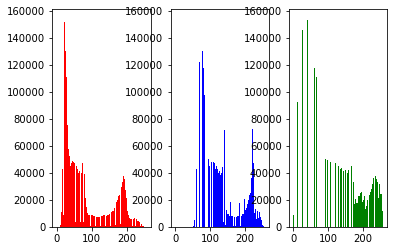

In [20]:
plt.subplot(131)
plt.hist(img_dark.flatten(),256,[0,256],color='r')
plt.subplot(132)
plt.hist(img_brighter.flatten(),256,[0,256],color='b')
plt.subplot(133)
plt.hist(img_output.flatten(),256,[0,256],color='g')
plt.show()

# Advance:Do a app for id photo bg change

# 改变证件照背景颜色

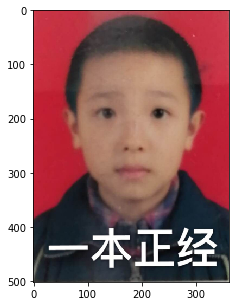

In [21]:
img_xiaowang=cv2.imread('xiaowang.jpg')
rows,cols,channels = img.shape
img_id=cv2.resize(img_xiaowang,None,fx=0.5,fy=0.5)
rows,cols,channels = img.shape
my_show(img_id)

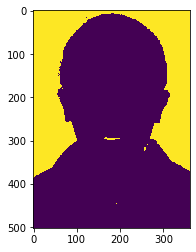

In [22]:
##获取红色背景区域（黄色表示背景颜色）

hsv = cv2.cvtColor(img_id,cv2.COLOR_BGR2HSV)
lower_red = np.array([170,125,56])
upper_red = np.array([180,255,255])
img_mask = cv2.inRange(hsv, lower_red, upper_red)

    
plt.imshow(img_mask)

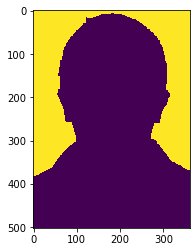

In [23]:
#腐蚀膨胀
erode=cv2.erode(img_mask,None,iterations=5)


dilate=cv2.dilate(erode,None,iterations=5)

plt.imshow(dilate)

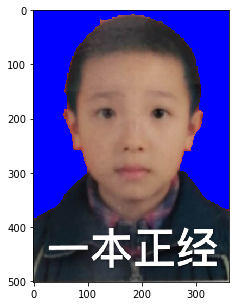

In [31]:
#遍历替换
img_id[dilate==255] = (255,0,0) #此处为BGR通道，（255，0，0）则为B=255

my_show(img_id)